In [1]:
import numpy as np
import pandas as pd

In [2]:
clients_df = pd.read_excel('./default_credit_card/credit_card.xls', sheat_name='Data', header=1)

In [3]:
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
clients_df.shape

(30000, 25)

In [5]:
clients_df.drop('ID', axis=1, inplace=True)

In [6]:
clients_df.shape

(30000, 24)

In [7]:
clients_df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

In [8]:
X_features = clients_df.drop('default', axis=1)
y_target = clients_df['default']

In [9]:
print(X_features.shape)
print(y_target.shape)

(30000, 23)
(30000,)


In [10]:
X_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

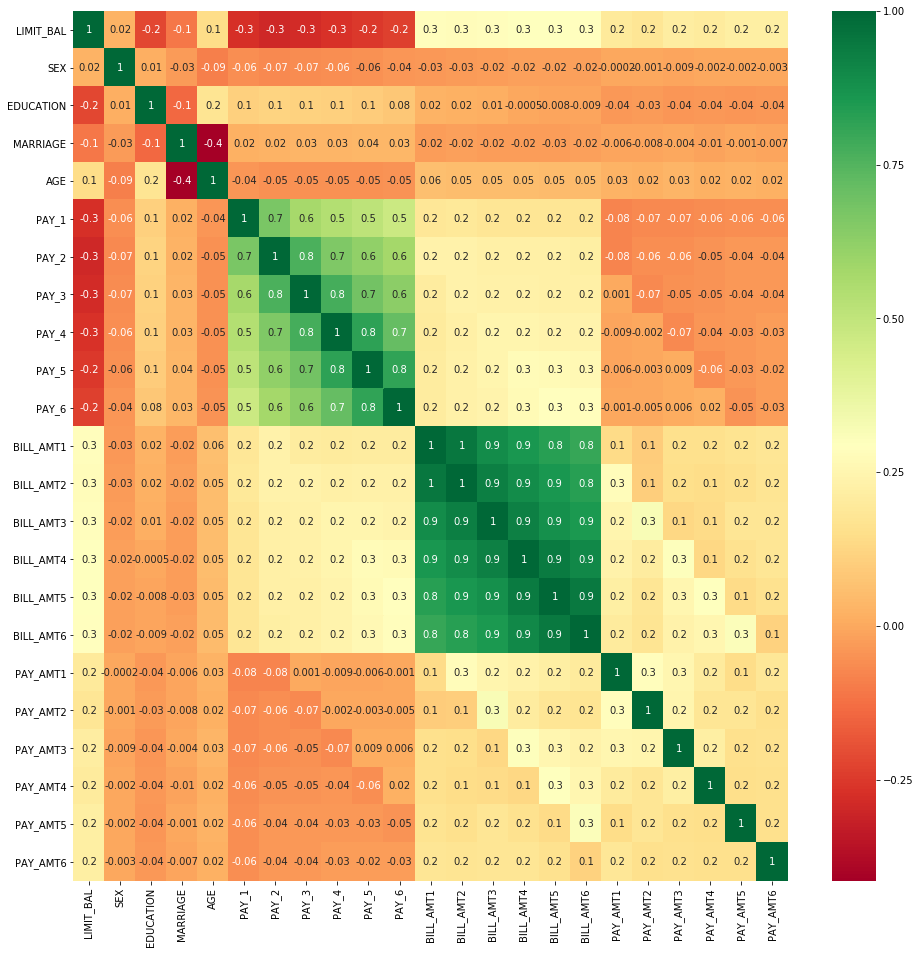

In [12]:
corr = X_features.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='RdYlGn')

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rf_clf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
X_features_pca = pca.fit_transform(X_features_scaled)
scores_pca = cross_val_score(rf_clf, X_features_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7926 0.7983 0.8031]
PCA 변환 데이터 세트 평균 정확도:0.7980
